<a href="https://colab.research.google.com/github/sgr1118/FD/blob/main/FD26_Regularization(220824).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 26-1.들어가며

1. 학습 목표
- 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
- L1 regularization과 L2 regularization의 차이를 설명합니다.
- 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다

2. 목차

(1) 들어가며

(2) Regularization과 Normalization

(3) L1 Regularization

(4) L2 Regularization

(5) Extra : Lp norm

(6) Dropout

(7) Batch Normalization

# 26-2. Regularization과 Normalization

1. Regularization? Normalization?

(1) Regularization : 정칙화라고 불리며, 오버피팅(overfitting)을 해결하기 위한 방법 중의 하나
-  종류 : L1, L2, Dropout, Batch normalization
- Regularization 기법들은 모델이 train set의 정답을 맞히지 못하도록 오버피팅을 방해(train loss가 증가) 하는 역할을 합니다.
-  train loss는 약간 증가하지만 결과적으로, validation loss나 최종적인 test loss를 감소시키려는 목적을 가지고 있지요.

(2) Normalization : 정규화라고 불리며, 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정
- 종류 : Z-score, MinMaxscaler
-  Normalization은 이를 모든 피처의 범위 분포를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정


In [ ]:
# Regularization와 Normalization 예재 (iris 데이터 활용)

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다

def converter(species):
  if species == 0:
    return 'setosa'
  elif species == 1:
    return 'versicolor'
  else:
    return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis = 1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


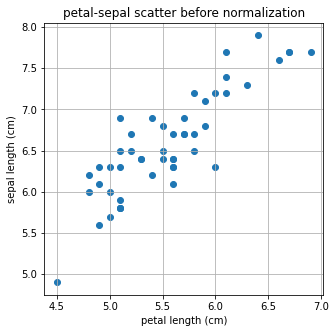

In [ ]:
# petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y 시각화
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

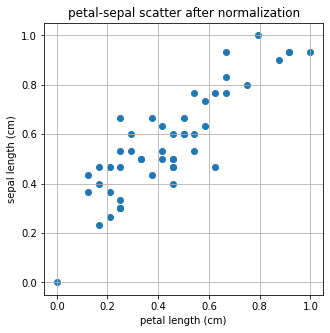

In [ ]:
# normalization (Minmax_scale)

from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

# 축의 범위가 달라진 것을 알 수 있다.

In [ ]:
#  간단한 회귀 문제를 풀면서 Regularization알아보기
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


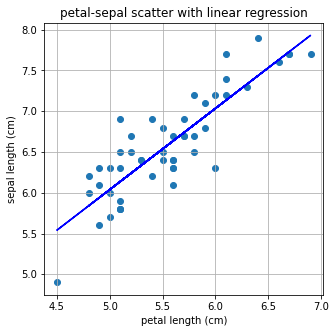

In [ ]:
# Linear Regression 일차함수와 산점도

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


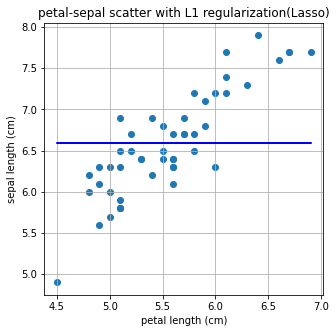

In [ ]:
#L1 regularization은 Lasso로 import 합니다.

from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


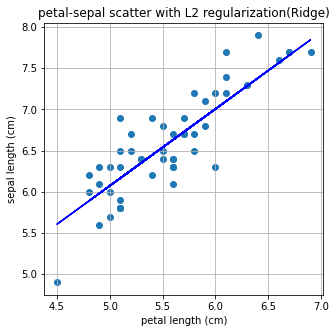

In [ ]:
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1, 1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

# 26-3. L1 Regularization



In [ ]:
# 컬럼 수가 많은 데이터에서의 L1 regularization 비교

from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

# feature 확인
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# target 확인
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [ ]:
#  Linear regression을 하고 오차 출력

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.2512897393972262
Mean Squared Error: 0.10624587409525563
Mean Root Squared Error: 0.3259537913497182


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [ ]:
# L1 regularization으로 문제를 풀이

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


- coefficient 부분을 보시면 Linear Regression과 L1 Regularization의 차이가 좀 더 두드러짐을 알 수 있습니다. Linear Regression에서는 모든 컬럼의 가중치를 탐색하여 구하는 반면, L1 Regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다.

- Error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있습니다.

- 이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다.

- 다만 Linear Regression과 L1, L2 Regularization의 차이 중 하나는 \alphaα라는 하이퍼파라미터(수식에서는 \lambdaλ)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점

# 26-4. L2 Regularization

2. L1 / L2 Regularization의 차이점

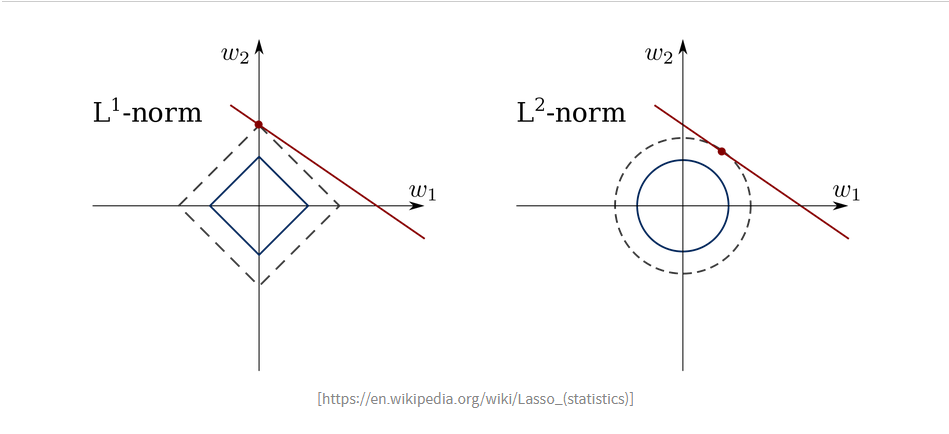

- Lasso는 |b|를 이용하여 마름모 형태의 제약조건이 생깁니다. 이 문제가 제약조건과 만나는 지점이 해가 됩니다. 그래서 L1 Regularization에서는 몇 개의 축에서 \betaβ값을 0으로 보냅니다. 이는 저번 차시에서 coefficient를 비교하면서 확인해 보았습니다.

- 이와 다르게 L2 regularization은 \beta^2β 
2
 이므로 원의 형태로 나타나게 됩니다. 그러므로 0에 가지는 않고 0에 가깝게 감을 확인할 수 있습니다. 또한 제곱이 들어가 있기 때문에 절댓값으로 L1 Norm을 쓰는 Lasso보다는 수렴이 빠르다는 장점이 있습니다. 이는 이전의 같은 문제에서 iteration을 제약조건으로 주며 실험해보겠습니다.

In [ ]:
# L1

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)

In [ ]:
# L1 regularization으로 iteration 횟수를 5회 적용
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769433
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# L2 regularization으로 iteration 횟수를 5회 적용

from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05, max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


- L2 Regularization의 문제는 Linear Regression과 같은 값이 나오지만, L1 Regularization에서는 앞 step과 같은 값을 확인할 수는 없었습니다.

- 심지어 수렴하지 않았다는 경고가 나온다.

### 정리

- L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징

- L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 Regularization보다는 수렴 속도가 빠르다는 장점

# 26-5. Extra : Lp norm

1. vector norm
- L1 / L2 Regularization에서 배운 Norm은 벡터에서 사용한 Norm으로 아래와 같이 정의

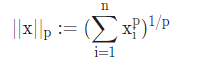


In [ ]:
# p의 값과 x의 형태를 바꾸어가며 실험해보기

x = np.array([1,10,1,5,1])
p=5

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p)**(1/p))
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

# result of numpy package norm function : 10.00008 
# result of making norm : 10.00008 

# result of numpy package norm function : 10.06179 
# result of making norm : 10.06179 

result of numpy package norm function : 10.06179 
result of making norm : 10.06179 


In [ ]:
# p=∞ 인 Infinity norm의 경우는 가장 큰 숫자를 출력합니다.
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


2. matrix norm

행렬의 norm의 경우는 벡터와 조금 다르며, 주로 p=1, inftyp=1,∞ 인 경우만 알면 됩니다.

현재 AA는 mm X nn 행렬입니다.

p=1인 경우에는 컬럼의 합이 가장 큰 값이 출력되고, p=\inftyp=∞인 경우에는 로우의 합이 가장 큰 값이 출력됩니다.

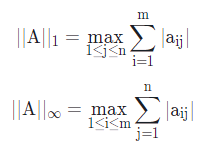


In [ ]:
A = np.array([[1,2,3], [1,2,3], [4,6,8]])
inf_norm_A = np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


# 26-6. Dropout

- 이름 그대로 몇 가지의 값들을 모든 뉴런에 전달하는 것이 아닌 확률적으로 버리면서 전달하는 기법

- 드롭아웃은 오버피팅을 막는 Regularization layer 중 하나

- 확률을 너무 높이면 제대로 전달되지 않으므로 학습이 잘되지 않고, 너무 낮으면 FC layer와 같다.

In [ ]:
# Dropout 실습 (fashion mnist)

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_image = train_image / 255.0
test_image = test_image / 255.0

In [ ]:
# Dropout = 0.9 적용
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history1 = model1.fit(train_image, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3605 - accuracy: 0.4679
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1484 - accuracy: 0.5375
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0981 - accuracy: 0.5534
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0710 - accuracy: 0.5656
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0465 - accuracy: 0.5742


In [ ]:
history_dict1 = history1.history
print(history_dict1.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy'])


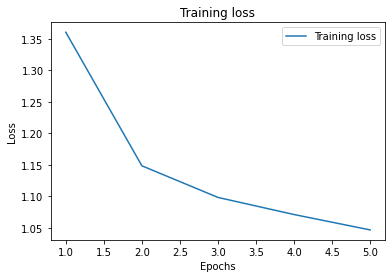

In [ ]:
# Loss, Accuracy 그래프 시각화 
acc = history_dict1['accuracy']
loss = history_dict1['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

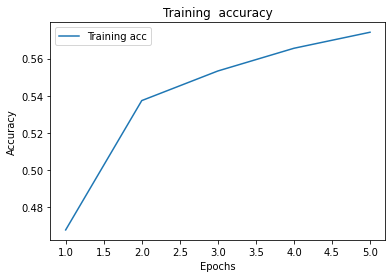

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Dropout 없이 모델 학습해보기
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history2 = model2.fit(train_image, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4965 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3103 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.8919


In [ ]:
history_dict2 = history2.history
print(history_dict2.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy'])


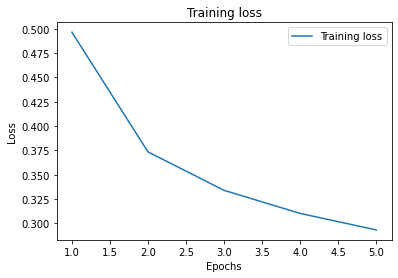

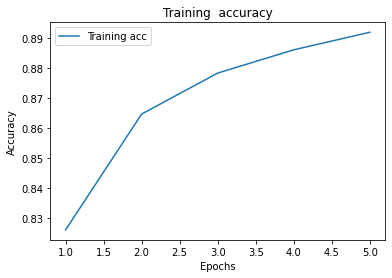

In [ ]:
# Loss, Accuracy 그래프 시각화 
acc = history_dict2['accuracy']
loss = history_dict2['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Overfitting

- overfitting이 되는지 확인해 보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도

- 데이터를 이제 train:valid=99:1로 split 한 뒤에 loss function의 값을 그려보고, overfitting 이 나는 fully connected layer를 만들어보도록 합시다.

In [ ]:
# 실습 (Overfitting)

X_train, X_valid, y_train, y_valid = train_test_split(train_image, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/100
117/117 [==============================] - 4s 28ms/step - loss: 2.0476 - accuracy: 0.4904 - val_loss: 1.6422 - val_accuracy: 0.6100
Epoch 2/100
117/117 [==============================] - 2s 19ms/step - loss: 1.4028 - accuracy: 0.6254 - val_loss: 1.1854 - val_accuracy: 0.6550
Epoch 3/100
117/117 [==============================] - 2s 13ms/step - loss: 1.0776 - accuracy: 0.6801 - val_loss: 0.9591 - val_accuracy: 0.7167
Epoch 4/100
117/117 [==============================] - 2s 13ms/step - loss: 0.8970 - accuracy: 0.7178 - val_loss: 0.8163 - val_accuracy: 0.7517
Epoch 5/100
117/117 [==============================] - 2s 15ms/step - loss: 0.7891 - accuracy: 0.7351 - val_loss: 0.7424 - val_accuracy: 0.7567
Epoch 6/100
117/117 [==============================] - 2s 20ms/step - loss: 0.7224 - accuracy: 0.7486 - val_loss: 0.6862 - val_accuracy: 0.7767
Epoch 7/100
117/117 [==============================] - 2s 20ms/step - loss: 0.6784 - accuracy: 0.7598 - val_loss: 0.6488 - val_accuracy:

In [ ]:
history_dict3 = history3.history
print(history_dict3.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

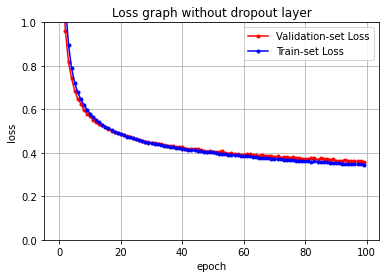

In [ ]:
# loss 값을 plot 해보겠습니다.
y_vloss = history3.history['val_loss']
y_loss = history3.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

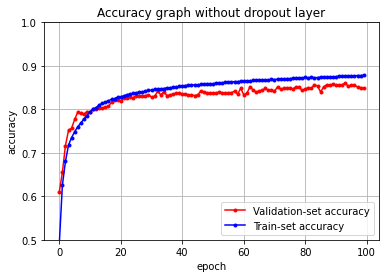

In [ ]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history3.history['val_accuracy']
y_acc = history3.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

위의 droupout layer가 없는 fully connected layer에서 100번 정도의 학습을 하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌습니다.

그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었습니다.



In [ ]:
# 오버피팅을 만든 환경에서 Dropout layer를 추가해보기
#Dense layer만으로 만들어 낸 classification 모델입니다.
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history4 = model4.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/100
117/117 [==============================] - 2s 17ms/step - loss: 2.0728 - accuracy: 0.4562 - val_loss: 1.6880 - val_accuracy: 0.6400
Epoch 2/100
117/117 [==============================] - 3s 22ms/step - loss: 1.4620 - accuracy: 0.5704 - val_loss: 1.2189 - val_accuracy: 0.6550
Epoch 3/100
117/117 [==============================] - 3s 21ms/step - loss: 1.1563 - accuracy: 0.6212 - val_loss: 1.0061 - val_accuracy: 0.7083
Epoch 4/100
117/117 [==============================] - 3s 23ms/step - loss: 0.9916 - accuracy: 0.6676 - val_loss: 0.8739 - val_accuracy: 0.7450
Epoch 5/100
117/117 [==============================] - 3s 22ms/step - loss: 0.8875 - accuracy: 0.6979 - val_loss: 0.7866 - val_accuracy: 0.7517
Epoch 6/100
117/117 [==============================] - 3s 24ms/step - loss: 0.8174 - accuracy: 0.7153 - val_loss: 0.7312 - val_accuracy: 0.7667
Epoch 7/100
117/117 [==============================] - 4s 31ms/step - loss: 0.7728 - accuracy: 0.7244 - val_loss: 0.6925 - val_accuracy:

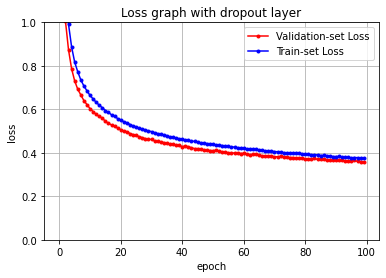

In [ ]:
# loss 값을 plot 해보겠습니다.
y_vloss = history4.history['val_loss']
y_loss = history4.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph with dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

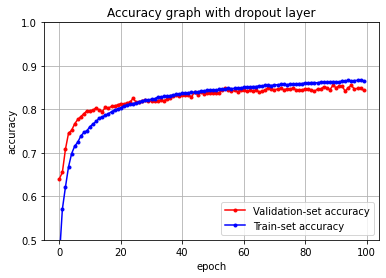

In [ ]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history4.history['val_accuracy']
y_acc = history4.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

좋은 데이터를 가지고 오버피팅을 만드는 환경이 조금 어렵긴 했지만, Dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인하였습니다. 사실 더 복잡한 네트워크나, 더 어려운 데이터의 경우에는 이러한 오버피팅이 더 자주 있는 일이므로, Dropout layer를 추가하는 경우가 많습니다. 하지만 이 또한 확률 값이 파라미터로 들어가므로, 어떠한 값을 선택하느냐는 데이터와 네트워크에 따라 달린 일입니다.

# 26-7. Batch Normalization

- 아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교

-  중점적으로 봐야 할 내용은 정확도 비교와 속도의 차이

[batch_normalization](https://arxiv.org/pdf/1502.03167.pdf)

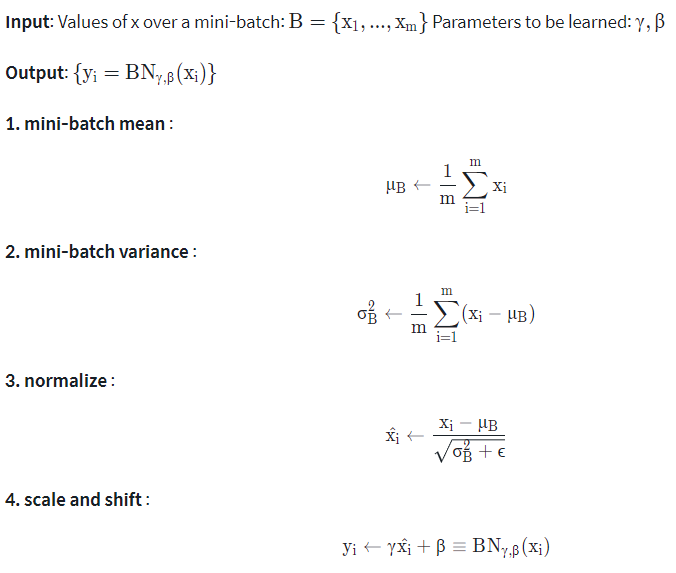

In [ ]:
# 데이터 준비
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

# 데이터 나누기 및 정규화
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# 모델 학습 준비
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history5 = model5.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 3s 103ms/step - loss: 1.2404 - accuracy: 0.6158 - val_loss: 0.7515 - val_accuracy: 0.7447
Epoch 2/20
21/21 [==============================] - 1s 36ms/step - loss: 0.6620 - accuracy: 0.7748 - val_loss: 0.6076 - val_accuracy: 0.7966
Epoch 3/20
21/21 [==============================] - 1s 35ms/step - loss: 0.5616 - accuracy: 0.8138 - val_loss: 0.5476 - val_accuracy: 0.8142
Epoch 4/20
21/21 [==============================] - 1s 39ms/step - loss: 0.5169 - accuracy: 0.8268 - val_loss: 0.5078 - val_accuracy: 0.8262
Epoch 5/20
21/21 [==============================] - 1s 34ms/step - loss: 0.4835 - accuracy: 0.8396 - val_loss: 0.4894 - val_accuracy: 0.8313
Epoch 6/20
21/21 [==============================] - 1s 44ms/step - loss: 0.4625 - accuracy: 0.8450 - val_loss: 0.4642 - val_accuracy: 0.8424
Epoch 7/20
21/21 [==============================] - 1s 52ms/step - loss: 0.4423 - accuracy: 0.8515 - val_loss: 0.4494 - val_accuracy: 0.8469
Epoch 8/20
2

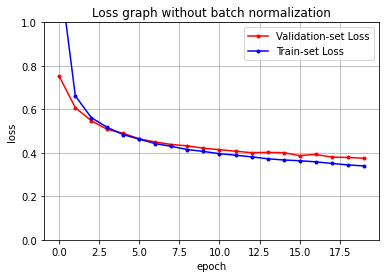

In [ ]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history5.history['val_loss']
y_loss = history5.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 에포크가 7을 넘어갈 때 val_loss가 train_loss를 넘어서고있다.

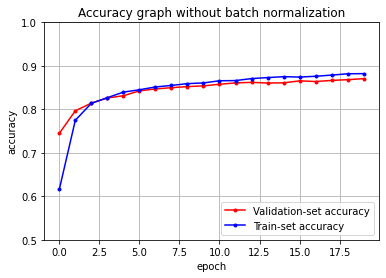

In [ ]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history5.history['val_accuracy']
y_acc = history5.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 

In [ ]:
# BatchNormalization layer를 추가한 실습
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model6.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history6 = model6.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 2s 43ms/step - loss: 0.9339 - accuracy: 0.6901 - val_loss: 1.0330 - val_accuracy: 0.6924
Epoch 2/20
21/21 [==============================] - 1s 35ms/step - loss: 0.5263 - accuracy: 0.8221 - val_loss: 0.8555 - val_accuracy: 0.7519
Epoch 3/20
21/21 [==============================] - 1s 34ms/step - loss: 0.4573 - accuracy: 0.8437 - val_loss: 0.7423 - val_accuracy: 0.7940
Epoch 4/20
21/21 [==============================] - 1s 34ms/step - loss: 0.4160 - accuracy: 0.8565 - val_loss: 0.6917 - val_accuracy: 0.8093
Epoch 5/20
21/21 [==============================] - 1s 34ms/step - loss: 0.3870 - accuracy: 0.8665 - val_loss: 0.6257 - val_accuracy: 0.8353
Epoch 6/20
21/21 [==============================] - 1s 34ms/step - loss: 0.3666 - accuracy: 0.8724 - val_loss: 0.5812 - val_accuracy: 0.8366
Epoch 7/20
21/21 [==============================] - 1s 42ms/step - loss: 0.3489 - accuracy: 0.8786 - val_loss: 0.5402 - val_accuracy: 0.8503
Epoch 8/20
21

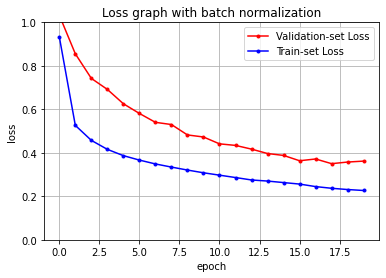

In [ ]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history6.history['val_loss']
y_loss = history6.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

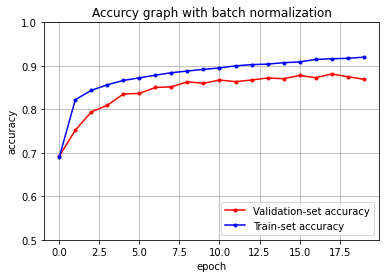

In [ ]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history6.history['val_accuracy']
y_acc = history6.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

기존의 fully connected layer도 낮지 않은 결과를 가져오지만, Batch Normalization을 추가하니 좀 더 빠르게 정확도 상승이 있음을 확인할 수 있습니다. 또한 loss 함수의 감소도 더 빨라짐을 확인할 수 있었습니다. 즉 Batch Normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며, 앞서 설명해 드린 \epsilonϵ 부분으로 인해 안정적인 학습이 가능해집니다.